## Blending Images

In [1]:
import cv2

In [2]:
img1= cv2.imread('dog_backpack.jpg')
img2 = cv2.imread('watermark_no_copy.png')

In [3]:
img1.shape

(1401, 934, 3)

In [4]:
img2.shape

(1280, 1277, 3)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

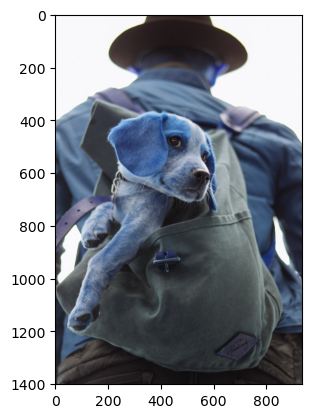

In [6]:
plt.imshow(img1)

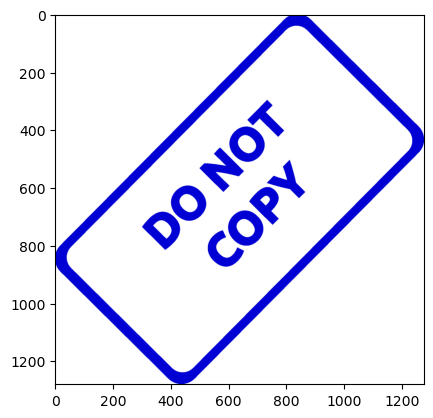

In [7]:
plt.imshow(img2)

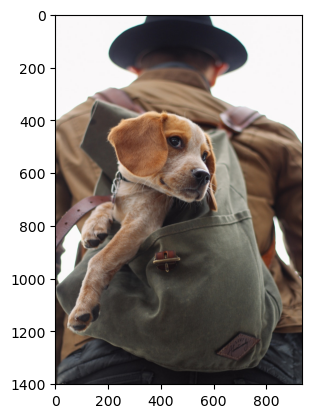

In [8]:
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.imshow(img1)

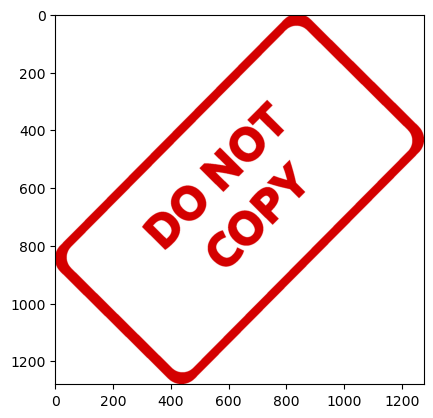

In [9]:
plt.imshow(img2)

In [10]:
img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.resize(img2,(1200,1200))

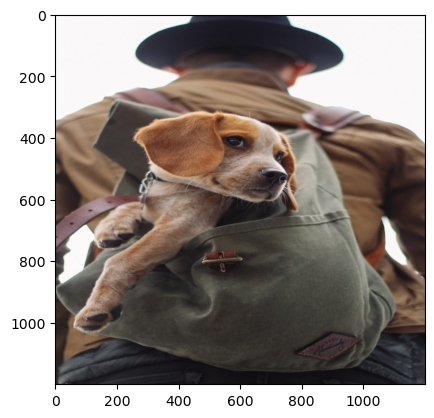

In [11]:
plt.imshow(img1)

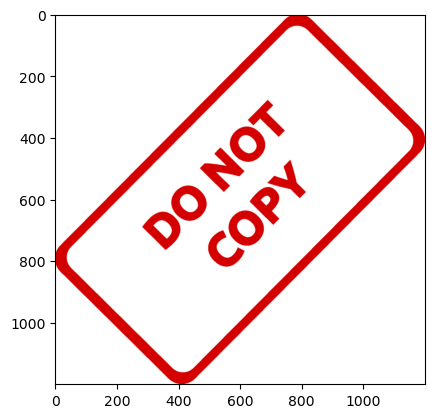

In [12]:
plt.imshow(img2)

In [13]:
img1.shape

(1200, 1200, 3)

In [14]:
img2.shape

(1200, 1200, 3)

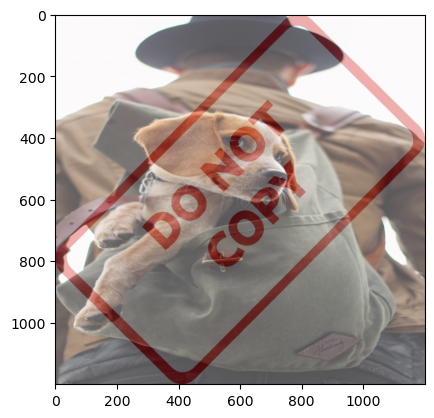

In [15]:
blended =cv2.addWeighted(src1=img1,alpha=0.7,src2=img2,beta=0.3,gamma=0)
plt.imshow(blended)

## With Different Sizes

In [16]:
img1 = cv2.imread('dog_backpack.jpg')
img2 = cv2.imread('watermark_no_copy.png')

img2 = cv2.resize(img2,(600,600))

In [17]:
large_img =img1
small_img = img2

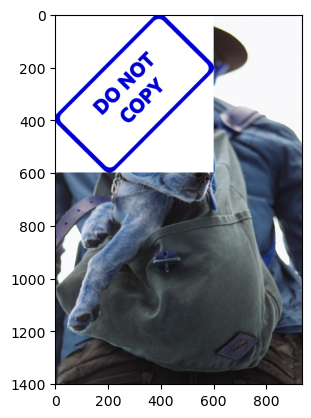

In [18]:
x_offset =0
y_offset = 0
large_img[y_offset:y_offset+small_img.shape[0],x_offset:x_offset+small_img.shape[1]] = small_img
plt.imshow(large_img)

## Fitting this in bag

In [19]:
import numpy as np
import cv2

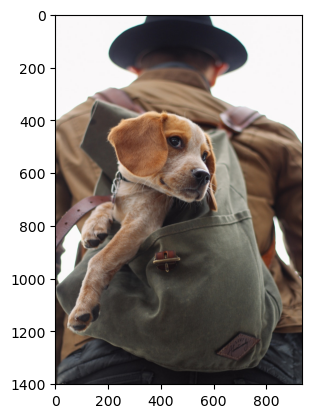

In [20]:
img1 = cv2.imread('dog_backpack.jpg')
img2 = cv2.imread('watermark_no_copy.png')
img2 = cv2.resize(img2,(600,600))

img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.imshow(img1)

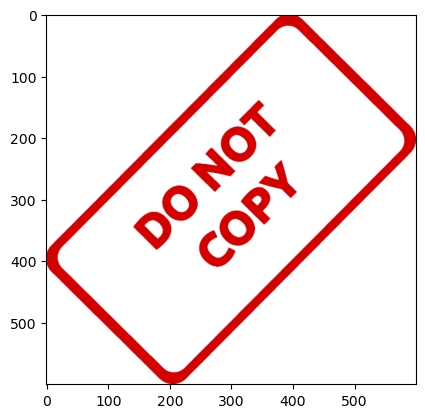

In [21]:
plt.imshow(img2)

In [22]:
img1.shape

(1401, 934, 3)

In [23]:
x_offset=934-600
y_offset=1401-600

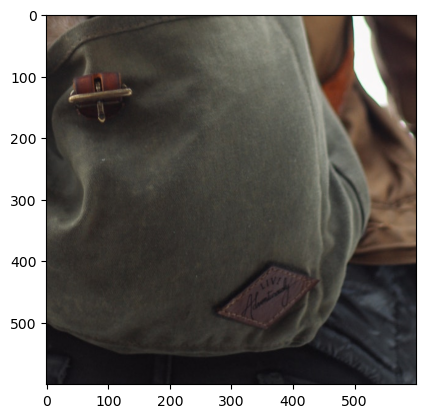

In [24]:
rows,cols,channels = img2.shape
roi = img1[y_offset:1401,x_offset:943]
plt.imshow(roi)

In [25]:
roi.shape

(600, 600, 3)

In [26]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
img2gray.shape

(600, 600)

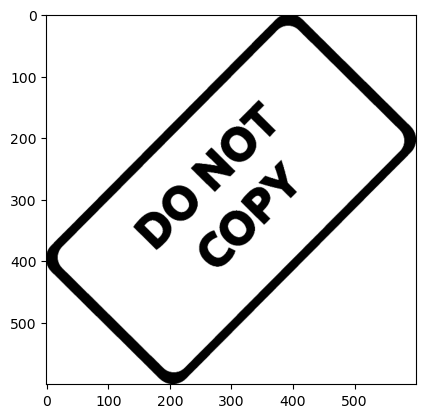

In [27]:
plt.imshow(img2gray,cmap='gray')

In [28]:
mask_inv = cv2.bitwise_not(img2gray)
mask_inv.shape

(600, 600)

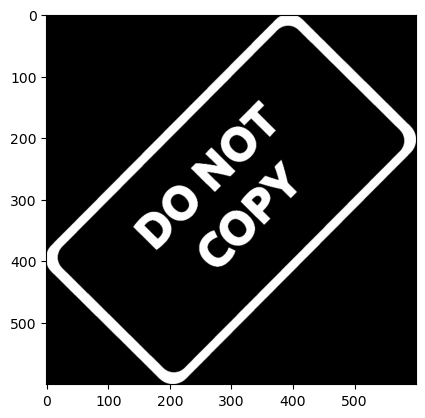

In [29]:
plt.imshow(mask_inv,cmap='gray')

In [30]:
white_background = np.full(img2.shape,255,dtype=np.uint8)
bk=cv2.bitwise_or(white_background,white_background,mask=mask_inv)
bk.shape

(600, 600, 3)

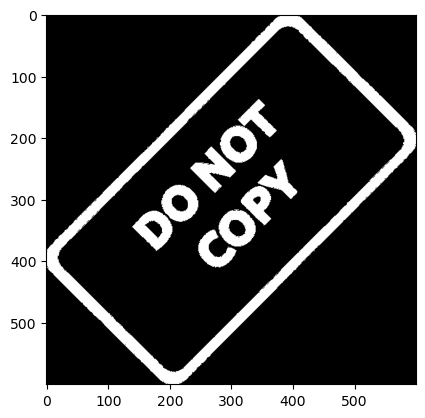

In [31]:
plt.imshow(bk)

In [ ]:
plt.imshow(mask_inv,cmap='gray')

In [ ]:
fg = cv2.bitwise_or(img2,img2,mask=mask_inv)
plt.imshow(fg)

In [ ]:
fg.shape

In [ ]:
final_roi = cv2.bitwise_or(roi,fg)
plt.imshow(final_roi)

In [ ]:
large_img = img1
small_img = final_roi


large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img

plt.imshow(large_img)